# Applying K Means Clustering
## Actual Number of Speakers in the 180s audio = 4


In [63]:
import numpy as np
import umap.umap_ as umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


#embedding of 177, 3sec audios as row vctors in a matrix
audio_matrix = np.loadtxt("/Users/abhinav/Downloads/wav_vector")


audio_matrix = umap.UMAP(n_neighbors=5, min_dist=0.5).fit_transform(audio_matrix)


# Apply k-means clustering
num_speakers = 0  

#desired number of clusters (number of speakers)
k = 4 
#k-means clustering
kmeans = KMeans(n_clusters=k, n_init = 10)
kmeans.fit(audio_matrix)

# Get the cluster labels assigned to each audio sample
labels = kmeans.labels_

# Count the unique cluster labels to determine the number of speakers
num_speakers = len(np.unique(labels))

# Print the total number of speakers
print("Total number of speakers:", num_speakers)


Total number of speakers: 4


In [64]:
labels

array([3, 2, 0, 1, 1, 0, 0, 0, 3, 3, 3, 1, 0, 0, 3, 2, 2, 2, 1, 2, 0, 1,
       3, 1, 3, 2, 0, 0, 3, 1, 0, 0, 2, 2, 1, 2, 1, 1, 0, 1, 2, 3, 1, 0,
       2, 0, 3, 2, 3, 2, 0, 2, 3, 3, 3, 2, 2, 1, 2, 0, 3, 1, 3, 1, 1, 2,
       0, 2, 2, 1, 3, 2, 3, 1, 2, 1, 0, 1, 0, 1, 2, 3, 1, 2, 0, 1, 3, 2,
       2, 2, 2, 2, 1, 2, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 2, 1, 2, 3, 0, 2,
       2, 1, 0, 3, 3, 1, 3, 2, 1, 2, 1, 3, 2, 2, 2, 3, 1, 3, 0, 1, 2, 3,
       0, 3, 3, 3, 3, 3, 3, 1, 2, 0, 1, 0, 2, 1, 3, 0, 0, 1, 0, 3, 0, 0,
       0, 0, 0, 3, 2, 2, 0, 1, 1, 3, 0, 2, 1, 2, 3, 0, 0, 2, 0, 0, 1, 1,
       0], dtype=int32)

## Optimal number of clusters

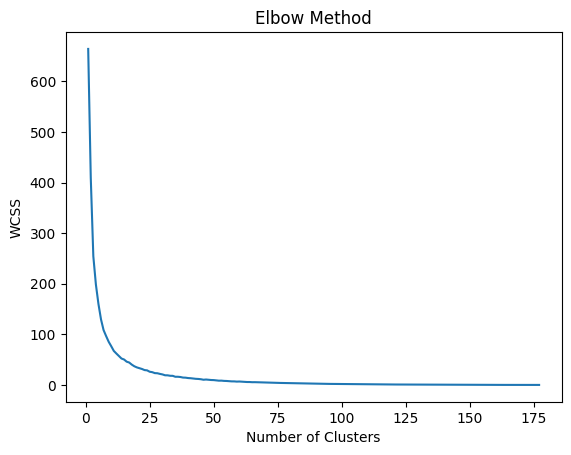

In [66]:
# Set the range of clusters to evaluate optimal number of clusters
min_clusters = 1
max_clusters = 177
wcss = []  # List to store within-cluster sum of squares

for k in range(min_clusters, max_clusters + 1):
    #k-means clustering
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(audio_matrix)
    
    # Append the WCSS to the list
    wcss.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.plot(range(min_clusters, max_clusters + 1), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

Elbow, seems to lie before 15, well before 25

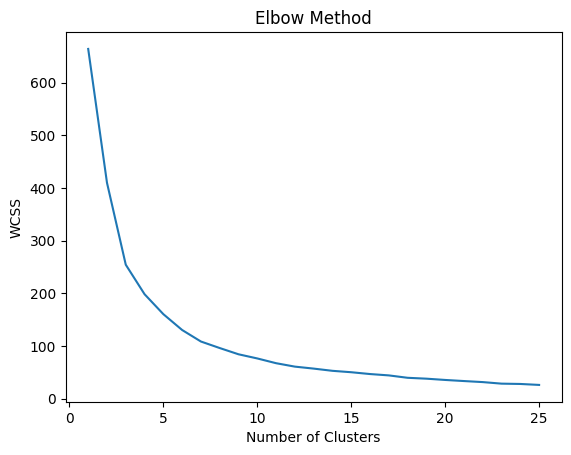

In [68]:
# Set the range of clusters to evaluate optimal number of clusters
min_clusters = 1
max_clusters = 25
wcss = []  # List to store within-cluster sum of squares

for k in range(min_clusters, max_clusters + 1):
    #k-means clustering
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(audio_matrix)
    
    # Append the WCSS to the list
    wcss.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.plot(range(min_clusters, max_clusters + 1), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

optimal number of speakers [5-1,5+1]

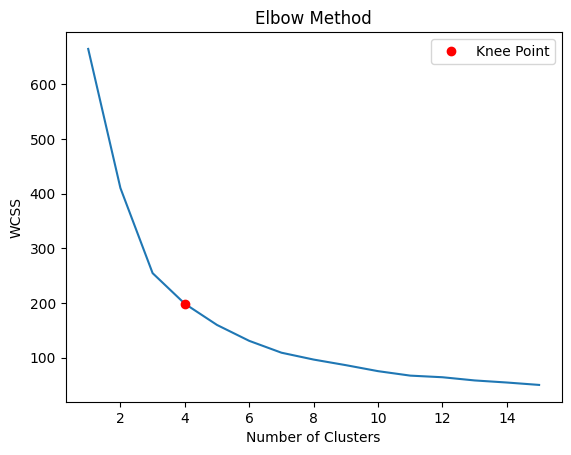

Knee Point: 4


In [75]:
from kneed import KneeLocator

# Set the range of clusters to evaluate optimal number of clusters
min_clusters = 1
max_clusters = 15
wcss = []  # List to store within-cluster sum of squares

for k in range(min_clusters, max_clusters + 1):
    # k-means clustering
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(audio_matrix)

    # Append the WCSS to the list
    wcss.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.plot(range(min_clusters, max_clusters + 1), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

# Apply KneeLocator to find the knee point
knee = KneeLocator(range(min_clusters, max_clusters + 1), wcss, curve='convex', direction='decreasing')

# Highlight the knee point on the plot
plt.plot(knee.knee, wcss[knee.knee - min_clusters], 'ro', label='Knee Point')
plt.legend()

plt.show()

# Print the identified knee point
print("Knee Point:", knee.knee)
